In [1]:
from PIL import Image
import os,  glob
import numpy as np
import random, math

In [2]:
#画像が保存されているデータセットフォルダ
root_dir = "/home/arimachi828/HDD/work2/DL_env2/image_recog/datasets5000"
#分類したいカテゴリ
categories = ["オフショット","プロフィール","試合","集合写真"]

#画像データ用配列
X = []
#ラベルデータ用配列
Y = []


In [3]:
def make_sample(files):
    global X, Y
    X = []
    Y = []
    for cat, fname in files:
        add_sample(cat, fname)
    return np.array(X), np.array(Y)


def add_sample(cat, fname):
    img = Image.open(fname)
    img = img.convert("RGB")
    img = img.resize((150,150))
    data = np.asarray(img)
    X.append(data)
    Y.append(cat)

    
allfiles = []

for idx, cat in enumerate(categories):
    image_dir = root_dir + "/" + cat
    files = glob.glob(image_dir + "/*.jpg")
    for f in files:
        allfiles.append((idx, f))
        
        
random.shuffle(allfiles)
th = math.floor(len(allfiles)*0.8)
train = allfiles[0:th]
test = allfiles[th:]
X_train,Y_train = make_sample(train)
X_test,Y_test = make_sample(test)
xy = (X_train,X_test,Y_train,Y_test)
#データを保存する
np.save("/home/arimachi828/HDD/work2/DL_env2/image_recog/glp_data.npy",xy)


In [1]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation = "relu"))
model.add(layers.Dense(4,activation = "softmax"))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [2]:
from keras import optimizers

model.compile(loss="binary_crossentropy",optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=["acc"])

In [3]:
from keras.utils import np_utils
import numpy as np

X_train,X_test,Y_train,Y_test = np.load("/home/arimachi828/HDD/work2/DL_env2/image_recog/glp_data.npy")
categories = ["プライベート","プロフィール","試合時","集合写真"]
nb_classes=len(categories)
X_train = X_train.astype("float")/255
X_test = X_test.astype("float")/255

Y_train = np_utils.to_categorical(Y_train,nb_classes)
Y_test = np_utils.to_categorical(Y_test,nb_classes)


In [4]:
%%timeit
global model
model = model.fit(X_train,
                 Y_train,
                 epochs=10,
                 batch_size=6,
                 validation_data=(X_test,Y_test))


Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 48s 3ms/step - loss: 0.3652 - acc: 0.8342 - val_loss: 0.2824 - val_acc: 0.8805
Epoch 2/10
16000/16000 [==============================] - 46s 3ms/step - loss: 0.2706 - acc: 0.8865 - val_loss: 0.2896 - val_acc: 0.8788
Epoch 3/10
16000/16000 [==============================] - 46s 3ms/step - loss: 0.2297 - acc: 0.9073 - val_loss: 0.2176 - val_acc: 0.9149
Epoch 4/10
16000/16000 [==============================] - 46s 3ms/step - loss: 0.2086 - acc: 0.9175 - val_loss: 0.1910 - val_acc: 0.9247
Epoch 5/10
16000/16000 [==============================] - 43s 3ms/step - loss: 0.1951 - acc: 0.9236 - val_loss: 0.2123 - val_acc: 0.9169
Epoch 6/10
16000/16000 [==============================] - 46s 3ms/step - loss: 0.1905 - acc: 0.9255 - val_loss: 0.2240 - val_acc: 0.9129
Epoch 7/10
16000/16000 [==============================] - 47s 3ms/step - loss: 0.1813 - acc: 0.9301 - val_loss: 0.1645 - val_acc:

AttributeError: 'History' object has no attribute 'fit'

In [8]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

AttributeError: 'History' object has no attribute 'evaluate'

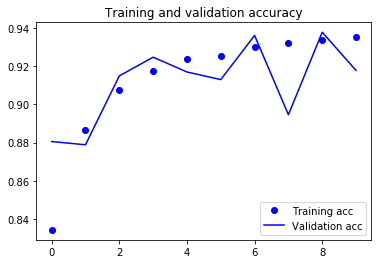

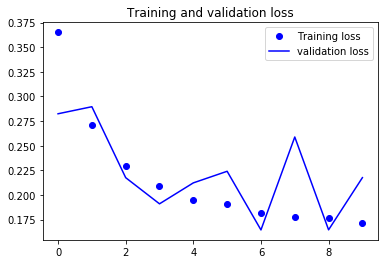

In [6]:
import matplotlib.pyplot as plt
acc = model.history['acc']
val_acc=model.history['val_acc']
loss = model.history['loss']
val_loss = model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('精度を示すグラフのファイル名')

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss' )
plt.legend()
plt.savefig('損失値を示すグラフのファイル名')

In [8]:
#モデルの保存----------------------------------------------------------------------------------------------
json_string = model.model.to_json()
open('/home/arimachi828/HDD/work2/DL_env2/image_recog/smile_predict.json', 'w').write(json_string)

#重みの保存

hdf5_file = "/home/arimachi828/HDD/work2/DL_env2/image_recog/smile_predict.hdf5"
model.model.save_weights(hdf5_file)
#----------------------------------------------------------------------------------------------------------

In [9]:
#未知のデータで精度を測る-------------------------------------------------------------------------------------
from PIL import Image
import os, glob
import numpy as np
import random, math

# 画像が保存されているディレクトリのパス
root_dir = "/home/arimachi828/HDD/work2/DL_env2/image_recog/datasets_test"
# 画像が保存されているフォルダ名
categories = ["プライベート","プロフィール","試合時","集合写真"]

X = [] # 画像データ
Y = [] # ラベルデータ

allfiles = []
for idx, cat in enumerate(categories):
    image_dir = root_dir + "/" + cat
    files = glob.glob(image_dir + "/*.jpg")
    for f in files:
        allfiles.append((idx, f))

for cat, fname in allfiles:
    img = Image.open(fname)
    img = img.convert("RGB")
    img = img.resize((150, 150))
    data = np.asarray(img)
    X.append(data)
    Y.append(cat)

x = np.array(X)
y = np.array(Y)

np.save("/home/arimachi828/HDD/work2/DL_env2/image_recog/smile_data_test_X_150.npy", x)
np.save("/home/arimachi828/HDD/work2/DL_env2/image_recog/smile_data_test_Y_150.npy", y)

In [10]:
test_X = np.load("smile_data_test_X_150.npy")
test_Y = np.load("smile_data_test_Y_150.npy")

from keras.utils import np_utils
test_Y = np_utils.to_categorical(test_Y,4)

score = model.model.evaluate(x=test_X,y=test_Y)

print('loss=',score[0])
print('accuracy',score[1])
#-------------------------------------------------------------------------------------------------------------

20/20 [==============================] - 0s 6ms/step
loss= 0.40075603127479553
accuracy 0.9750000238418579


In [3]:
from keras import models
from keras.models import model_from_json
from keras.preprocessing import image
import numpy as np

#保存したモデルの読み込み
model = model_from_json(open('/home/arimachi828/HDD/work2/DL_env2/image_recog/smile_predict.json').read())
#保存した重みの読み込み
model.load_weights("/home/arimachi828/HDD/work2/DL_env2/image_recog/smile_predict.hdf5")

categories = ["オフショット","プロフィール","試合","集合写真"]


#画像を読み込む
img_path = str(input())
img = image.load_img(img_path,target_size=(150, 150, 3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

#予測
features = model.predict(x)

#予測結果によって処理を分ける
if features[0,0] == 1:
    print ("楽しそうなオフショット写真ですね")

elif features[0,1] == 1:
    print ("真剣なプロフィール写真ですね")

else:
    for i in range(0,4):
          if features[0,i] == 1:
              cat = categories[i]
    message = "あなたが選んでいるのは「" + cat + "」の写真ではありませんか？"
    print(message)
    

/home/arimachi828/HDD/work2/DL_env2/image_recog/data2/16関西大学第一高等学校硬式野球部SPOBOOK/5.選手権大阪大会  開会式と履正社高校戦/アルバム・全国高等学校野球選手権大阪大会/DSC_0043.JPG
あなたが選んでいるのは「試合」の写真ではありませんか？
